# Modul 6 Persamaan Diferensial Numerik: Metode *Shooting* dan *Linear Finite Difference* untuk Masalah Nilai Batas PDB

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

Di modul ini, kita akan membahas beberapa metode untuk masalah nilai batas untuk PDB, yaitu:

1. *Linear Shooting*
2. *Nonlinear Shotting*
3. *Linear Finite Difference*

## Review: Runge-Kutta orde 4 untuk sistem

*Shooting method* untuk masalah nilai batas melibatkan sistem persamaan diferensial. Kita akan menggunakan kode metode Runge-Kutta orde 4 untuk sistem dari modul sebelumnya:

In [12]:
function [t, w] = rko4_sysm(cell_f, a, b, N, alphas)
  m = length(cell_f);

  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(m, N + 1);
  t(1) = a;
  w(:, 1) = alphas;

  k1 = zeros(m, 1);
  k2 = zeros(m, 1);
  k3 = zeros(m, 1);
  k4 = zeros(m, 1);
  for i = 1 : N
    t(i + 1) = t(i) + h;

    for j = 1 : m
      k1(j) = h * cell_f{j}(t(i), w(:, i));
    endfor

    for j = 1 : m
      k2(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k1 / 2));
    endfor

    for j = 1 : m
      k3(j) = h * cell_f{j}(t(i) + (h / 2), w(:, i) + (k2 / 2));
    endfor

    for j = 1 : m
      k4(j) = h * cell_f{j}(t(i + 1), w(:, i) + k3);
    endfor

    for j = 1 : m
      w(j, i + 1) = w(j, i) + (k1(j) + 2 * k2(j) + 2 * k3(j) + k4(j)) / 6;
    endfor
  endfor
endfunction

Sebenarnya tidak harus metode Runge-Kutta orde 4 untuk sistem. Boleh ditukar dengan metode lainnya untuk sistem, misalnya metode Adams predictor-corrector orde 4 untuk sistem.

## *Linear Shooting*

### Bentuk umum, ide utama, penyederhanaan

Linear Shooting merupakan metode untuk menyelesaikan sejenis masalah nilai batas untuk PDB, yaitu yang berbentuk:

$y'' = f\left(x,y,y'\right) = p(x)y' + q(x)y + r(x), \;a\leq x\leq b$

$y(a)=\alpha, \;y(b)=\beta$

dengan

- $p(x), q(x), r(x)$ adalah fungsi kontinu dalam $x$
- $q(x) > 0$ pada $[a,b]$ agar dijamin ada solusi unik

Cara penyelesaiannya:

1. Selesaikan MNA PDB orde 2 berikut, solusinya disebut $y_1 \left(x\right)$:

$$y'' = p(x)y' + q(x)y + r(x), \quad a \le x \le b, \quad y\left(a\right) = \alpha, \quad y'\left(a\right) = 0$$

2. Selesaikan MNA PDB orde 2 berikut, solusinya disebut $y_2 \left(x\right)$

$$y'' = p(x)y' + q(x)y, \quad a \le x \le b, \quad y\left(a\right) = 0, \quad y'\left(a\right) = 1$$

3. Solusi akhirnya adalah

$$y\left(x\right) = y_1 \left(x\right) + \frac{\beta - y_1 \left(b\right)}{y_2 \left(b\right)} y_2 \left(x\right)$$

Kita bisa menuliskan kedua MNA PDB orde 2 tersebut masing-masing sebagai sistem PDB orde 1, seperti biasa dengan permisalan $u_1(x) = y(x)$ dan $u_2(x) = y'(x)$.

Sehingga, langkahnya menjadi:

1. Selesaikan sistem PDB orde 1 berikut. Kemudian solusi $u_1(x)$ disebut $y_1(x)$ dan solusi $u_2(x)$ disebut $y_1'(x)$.

\begin{aligned}
u_1'(x) &= u_2(x) \\
u_2'(x) &= p(x) u_2(x) + q(x) u_1(x) + r(x) \\
u_1 (a) &= \alpha, \quad u_2 (a) = 0
\end{aligned}

2. Selesaikan sistem PDB orde 1 berikut. Kemudian solusi $u_1(x)$ disebut $y_2(x)$ dan solusi $u_2(x)$ disebut $y_2'(x)$.

\begin{aligned}
u_1'(x) &= u_2(x) \\
u_2'(x) &= p(x)u_2(x) + q(x)u_1(x) \\
u_1 (a) &= 0, \quad u_2(a) = 1
\end{aligned}

3. Solusi akhirnya adalah

$$y(x) = y_1(x) + \frac{\beta - y_1(b)}{y_2(b)} y_2(x)$$

Kalau perlu,

$$y'(x) = y_1'(x) + \frac{\beta - y_1(b)}{y_2(b)} y_2'(x)$$

### Function file (dari pseudocode di buku)

In [ ]:
function [x_i, w_1i, w_2i] = linshoot_pseudocode(p, q, r, a, b, n, alpha, beta)
  h = (b - a)/n;
  u = [alpha ; 0];
  v = [0 ; 1];
  x_i = w_1i = w_2i = [];
  for i = 1:n
    x = a + (i-1)*h;

    k_11 = h * u(2,i);
    k_12 = h * (p(x)*u(2,i) + q(x)*u(1,i) + r(x));

    k_21 = h * (u(2,i)+(k_12/2));
    k_22 = h * (p(x+(h/2))*(u(2,i)+(k_12/2)) + q(x+(h/2))*(u(1,i)+(k_11/2)) + r(x+(h/2)));

    k_31 = h * (u(2,i)+(k_22/2));
    k_32 = h * (p(x+(h/2))*(u(2,i)+(k_22/2)) + q(x+(h/2))*(u(1,i)+(k_21/2)) + r(x+(h/2)));

    k_41 = h * (u(2,i)+k_32);
    k_42 = h * (p(x+h)*(u(2,i)+k_32) + q(x+h)*(u(1,i)+k_31) + r(x+h));

    u(1,i+1) = u(1,i) + ((k_11 + 2*k_21 + 2*k_31 + k_41)/6);
    u(2,i+1) = u(2,i) + ((k_12 + 2*k_22 + 2*k_32 + k_42)/6);

    kp_11 = h * v(2,i);
    kp_12 = h * (p(x)*v(2,i) + q(x)*v(1,i));

    kp_21 = h * (v(2,i) + (kp_12/2));
    kp_22 = h * (p(x+(h/2))*(v(2,i)+(kp_12/2)) + q(x+(h/2))*(v(1,i)+(kp_11/2)));

    kp_31 = h * (v(2,i)+(kp_22/2));
    kp_32 = h * (p(x+(h/2))*(v(2,i)+(kp_22/2)) + q(x+(h/2))*(v(1,i)+(kp_21/2)));

    kp_41 = h * (v(2,i)+kp_32);
    kp_42 = h * (p(x+h)*(v(2,i)+kp_32) + q(x+h)*(v(1,i)+kp_31));

    v(1,i+1) = v(1,i) + (kp_11 + 2*kp_21 + 2*kp_31 + kp_41)/6;
    v(2,i+1) = v(2,i) + (kp_12 + 2*kp_22 + 2*kp_32 + kp_42)/6;
  endfor

  w = [alpha ; ((beta - u(1,(n+1))) / v(1,(n+1)))];
  x_i(1) = a;
  w_1i(1) = w(1,1);
  w_2i(1) = w(2,1);

  for i = 2:(n+1)
    W1 = u(1,i) + w(2,1)*v(1,i);
    W2 = u(2,i) + w(2,1)*v(2,i);
    x = a + (i-1)*h;
    x_i(i) = x;
    w_1i(i) = W1;
    w_2i(i) = W2;
  endfor
endfunction

### Function file (lebih sederhana)

In [16]:
function [x, w1, w2] = linear_shooting(p, q, r, a, b, N, alph, bet)
  % sistem PDB yang pertama
  u1_aksen = @(x, u) u(2);
  u2_aksen = @(x, u) p(x)*u(2) + q(x)*u(1) + r(x);
  [x, w_pers1] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [alph, 0]);
  y1_b = w_pers1(1, N+1);
  
  % sistem PDB yang kedua
  u1_aksen = @(x, u) u(2);
  u2_aksen = @(x, u) p(x)*u(2) + q(x)*u(1);
  [x, w_pers2] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [0, 1]);
  y2_b = w_pers2(1, N+1);
  
  % solusi akhir (superposisi)
  w_akhir = w_pers1 + (bet - y1_b)/(y2_b) * w_pers2;
  % dipisah jadi w1i (aproksimasi y(x)) dan w2i (aproksimasi y'(x))
  w1 = w_akhir(1, :);
  w2 = w_akhir(2, :);
endfunction

### Contoh Linear Shooting

$y'' = -\frac{2}{x}y' + \frac{2}{x^2}y + \frac{\sin(\ln(x))}{x^2}, \; 1\leq x\leq 2$

$y(1)=1,\; y(2)=2$

dengan $N=10$

dan solusi eksak:

$y=c_1x+\frac{c_2}{x^2} - \frac{3}{10}\sin(\ln(x))-\frac{1}{10}cos(\ln(x))$

$c_2 = \frac{1}{70}(8-12\sin(\ln(2)) - 4\cos(\ln(2)))$

$c_1 = \frac{11}{10}-c_2$

Berikut code script file untuk permasalahan di atas menggunakan metode linear shooting:

ans =

   1.0000   1.0000   1.0000
   1.1000   1.0926   1.0926
   1.2000   1.1871   1.1871
   1.3000   1.2834   1.2834
   1.4000   1.3814   1.3814
   1.5000   1.4812   1.4812
   1.6000   1.5824   1.5824
   1.7000   1.6850   1.6850
   1.8000   1.7889   1.7889
   1.9000   1.8939   1.8939
   2.0000   2.0000   2.0000



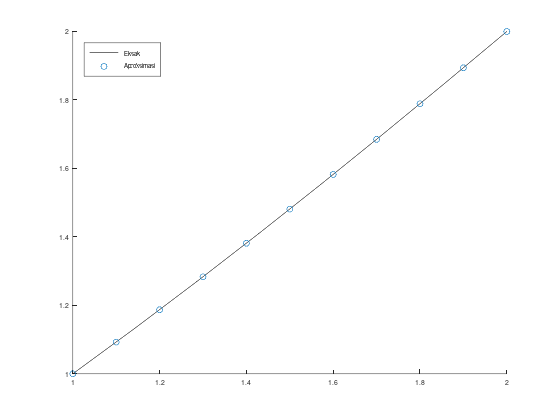

In [19]:
p = @(x) (-2 ./ x);
q = @(x) (2 ./ (x .^ 2));
r = @(x) (sin(log(x))*(x .^ (-2)));
a = 1;
b = 2;
N = 10;
alph = 1;
bet = 2;

[xi, w1i, w2i] = linear_shooting(p, q, r, a, b, N, alph, bet);

% solusi eksak
c2 = (8-12*sin(log(2)) - 4*cos(log(2)))/70;
c1 = (11/10) - c2;
sln = @(x) (c1*x + (c2*x.^(-2)) - (3/10)*sin(log(x)) - (1/10)*cos(log(x)));
y_eksak = sln(xi);

% tampilkan 
[xi, w1i', y_eksak]

hold on;
fplot(sln, [a,b], 'k');
scatter(xi, w1i, '-r');
legend('Eksak', 'Aproksimasi');
legend('location', 'northwest');

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

## *Nonlinear Shooting*

### Bentuk umum, ide utama

Nonlinear Shooting digunakan untuk menyelesaikan masalah PD berbentuk:

$y'' = f(x, y, y'), \; a\leq x \leq b$

$y(a)=\alpha, \; y(b)=\beta$

dengan $f$ boleh berupa fungsi linier maupun nonlinier

Cara penyelesaiannya:

1. Tentukan toleransi $\varepsilon$, dan pilih tebakan awal $t_0$ (yaitu $t_k$ sebelum iterasi pertama, yaitu dengan $k=0$). Kalau bingung, disarankan

$$t_0 = \frac{\beta - \alpha}{b-a}$$

2. Selesaikan MNA PDB orde 2 berikut, misalkan solusinya disebut $w(x,t_k)$:

$$y'' = f(x,y,y'), \quad a \le x \le b, \quad y(a) = \alpha, \quad y'(a) = t_k$$

3. Periksa apakah $\left|w(x,t_k) - \beta\right| \le \varepsilon$.

    - Kalau iya, selesai; solusi akhirnya adalah $y(x) = w(x,t_k)$.
    - Kalau tidak, peroleh tebakan baru untuk $t_i$ (misalnya dengan metode secant atau metode Newton), lalu kembali ke langkah 2.

Seperti biasa, kita bisa misalkan $u_1(x) = y(x)$ dan $u_2(x) = y'(x)$ agar MNA PDB orde 2 menjadi sistem PDB orde 1.

Cara penyelesaiannya menjadi:

1. Tentukan toleransi $\varepsilon$, dan pilih tebakan awal $t_0$ (yaitu $t_k$ sebelum iterasi pertama, yaitu dengan $k=0$). Kalau bingung, disarankan

$$t_0 = \frac{\beta - \alpha}{b-a}$$

2. Selesaikan sistem PDB orde 1 berikut. Kemudian $u_1(x)$ disebut $w(x,t_k)$ dan $u_2(x)$ disebut $w'(x,t_k)$.

\begin{aligned}
u_1'(x) &= u_2(x) \\
u_2'(x) &= f(x,u_1,u_2) \\
y(a) &= \alpha, \quad y'(a) = t_k
\end{aligned}

3. Periksa apakah $\left|w(x,t_k) - \beta\right| \le \varepsilon$.

    - Kalau iya, selesai; solusi akhirnya adalah $y(x) = w(x,t_k)$.
    - Kalau tidak, peroleh tebakan baru untuk $t_k$ (misalnya dengan metode secant atau metode Newton), lalu kembali ke langkah 2.

### Function file (metode secant)

In [ ]:
function [x, w1, w2] = nonlinear_shooting_secant(f, a, b, N, alph, bet, tol, t0, t1)
  u1_aksen = @(x, u) u(2);
  u2_aksen = @(x, u) f(x, u(1), u(2));
  
  t_k_min_2 = t0;
  t_k_min_1 = t1;
  [x, w_k_min_2] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [alph, t_k_min_2]);
  [x, w_k_min_1] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [alph, t_k_min_1]);
  w_k = w_k_min_1;
  err = abs(w_k(1, N+1) - bet);
  while !(err <= tol)
    pembilang = (w_k_min_1(1,N+1) - bet) * (t_k_min_1 - t_k_min_2);
    penyebut = w_k_min_1(1,N+1) - w_k_min_2(1,N+1);
    t_k = t_k_min_1 - pembilang/penyebut;

    t_k_min_2 = t_k_min_1
    t_k_min_1 = t_k

    [x, w_k] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [alph, t_k]);
    err = abs(w_k(1, N+1) - bet);
  endwhile
  % keluar loop artinya toleransi sudah terpenuhi
  
  % memisahkan w_k menjadi w1i dan w2i
  w1 = w_k(1, :);
  w2 = w_k(2, :);
endfunction

### Modifikasi untuk metode Newton

Untuk menggunakan metode Newton, diperlukan tidak hanya $y(b,t)$ tetapi juga turunannya $\frac{\partial y(b,t)}{\partial t}$ yang sayangnya tidak dimiliki.

Setelah penjabaran yang panjang di buku, ternyata bisa dimisalkan

$$z(x,t) = \frac{\partial y(x,t)}{\partial t}$$

dan nilai fungsi $z$ ini ternyata bisa diperoleh dengan menyelesaikan suatu MNA PDB orde 2 (lagi). Sehingga, di tiap iterasi, ada dua MNA PDB orde 2 yang harus diselesaikan.

Langkah *nonlinear shooting* dengan metode Newton bisa ditulis:

1. Hitung rumus $\frac{\partial f}{\partial y}(x,y,y')$ dan rumus $\frac{\partial f}{\partial y'}(x,y,y')$ secara analitik.

2. Tentukan toleransi $\varepsilon$, dan pilih tebakan awal $t_0$ (yaitu $t_k$ sebelum iterasi pertama, yaitu dengan $k=0$). Kalau bingung, disarankan

$$t_0 = \frac{\beta - \alpha}{b-a}$$

3. Selesaikan MNA PDB orde 2 berikut, misalkan solusinya disebut $w(x,t_k)$:

$$y'' = f(x,y,y'), \quad a \le x \le b, \quad y(a) = \alpha, \quad y'(a) = t_k$$

4. Selesaikan MNA PDB orde 2 berikut:

$$z'' = \frac{\partial f}{\partial y}(x,y,y')z(x) + \frac{\partial f}{\partial y'}(x,y,y')z'(x), \quad z(a) = 0, \quad z'(a) = 1$$

5. Periksa apakah $\left|w(x,t_k) - \beta\right| \le \varepsilon$.

    - Kalau iya, selesai; solusi akhirnya adalah $y(x) = w(x,t_k)$.
    - Kalau tidak, kembali ke langkah 3 setelah memperoleh tebakan baru untuk $t_k$:
    $$t_k = t_{k-1} - \frac{w(b, t_{k-1}) - \beta}{z(b, t_{k-1})}$$

Dengan permisalan $u_1$ dan $u_2$ agar PDB orde 2 menjadi sistem PDB orde 1, langkah-langkahnya menjadi:

1. Hitung rumus $\frac{\partial f}{\partial y}(x,y,y')$ dan rumus $\frac{\partial f}{\partial y'}(x,y,y')$ secara analitik.

2. Tentukan toleransi $\varepsilon$, dan pilih tebakan awal $t_0$ (yaitu $t_k$ sebelum iterasi pertama, yaitu dengan $k=0$). Kalau bingung, disarankan

$$t_0 = \frac{\beta - \alpha}{b-a}$$

3. Selesaikan sistem PDB orde 1 berikut. Kemudian $u_1(x)$ disebut $w(x,t_k)$ dan $u_2(x)$ disebut $w'(x,t_k)$.

\begin{aligned}
u_1'(x) &= u_2(x) \\
u_2'(x) &= f(x,u_1,u_2) \\
y(a) &= \alpha, \quad y'(a) = t_k
\end{aligned}

4. Selesaikan sistem PDB orde 1 berikut. Kemudian $u_1(x)$ disebut $z(x,t_k)$ dan $u_2(x)$ disebut $z'(x,t_k)$.

\begin{aligned}
u_1'(x) &= u_2(x) \\
u_2'(x) &= \frac{\partial f}{\partial y}(x,u_1,u_2)u_1(x) + \frac{\partial f}{\partial y'}(x,u_1,u_2)u_2(x) \\
u_1(a) &= 0, \quad u_2(a) = 1
\end{aligned}

5. Periksa apakah $\left|w(x,t_k) - \beta\right| \le \varepsilon$.

    - Kalau iya, selesai; solusi akhirnya adalah $y(x) = w(x,t_k)$.
    - Kalau tidak, kembali ke langkah 3 setelah memperoleh tebakan baru untuk $t_k$:
    $$t_k = t_{k-1} - \frac{w(b, t_{k-1}) - \beta}{z(b, t_{k-1})}$$

### Function file (dari pseudocode)

In [ ]:
function [x_i, w_1i, w_2i] = nonlinshoot_pseudocode(f, fy, fyp, a, b, n, alpha, beta, m, tol)
  % m adalah maksimum iterasi

  h = (b - a)/n;
  k = 1;
  tk = (beta - alpha)/(b - a);
  x_i = w_1i = w_2i = [];
  while k <= m
    w = [alpha;tk];
    u = [0,1];
    for i = 1:n
      x = a + (i-1)*h;

      k_11 = h*w(2,i);
      k_12 = h*f(x, w(1,i), w(2,i));

      k_21 = h*(w(2,i)+(k_12/2));
      k_22 = h*f((x+(h/2)), (w(1,i)+(k_11/2)), (w(2,i)+(k_12/2)));

      k_31 = h*(w(2,i)+(k_22/2));
      k_32 = h*f((x+(h/2)), (w(1,i)+(k_21/2)), (w(2,i)+(k_22/2)));

      k_41 = h*(w(2,i)+k_32);
      k_42 = h*f((x+h), (w(1,i)+k_31), (w(2,i)+k_32));

      w(1,i+1) = w(1,i) + ((k_11 + 2*k_21 + 2*k_31 + k_41)/6);
      w(2,i+1) = w(2,i) + ((k_12 + 2*k_22 + 2*k_32 + k_42)/6);

      kp_11 = h*u(2);
      kp_12 = h*(fy(x, w(1,i), w(2,i))*u(1) + fyp(x, w(1,i), w(2,i))*u(2));

      kp_21 = h*(u(2) + (kp_12/2));
      kp_22 = h*(fy((x+(h/2)), w(1,i), w(2,i))*u(1) + fyp((x+(h/2)), w(1,i), w(2,i))*(u(2) + (kp_12/2)));

      kp_31 = h*(u(2)+(kp_22/2));
      kp_32 = h*(fy((x+(h/2)), w(1,i), w(2,i))*(u(1) + (kp_21/2)) + fyp((x+(h/2)), w(1,i), w(2,i))*(u(2) + (kp_22/2)));

      kp_41 = h*(u(2)+kp_32);
      kp_42 = h*(fy((x+h), w(1,i), w(2,i))*(u(1)+kp_31) + fyp((x+h), w(1,i), w(2,i))*(u(2) + kp_32));

      u(1) = u(1) + (kp_11 + 2*kp_21 + 2*kp_31 + kp_41)/6;
      u(2) = u(2) + (kp_12 + 2*kp_22 + 2*kp_32 + kp_42)/6;
    endfor

  if abs(w(1,n+1) - beta) <= tol       % jika sudah mencapai batas toleransi maka program berhenti
    for i = 1:(n+1)
      x = a+(i-1)*h;
      x_i(i) = x;
      w_1i(i) = w(1,i);
      w_2i(i) = w(2,i);
    endfor
    return
  endif
  tk = tk-((w(1,n+1) - beta)/u(1));
  k = k + 1;
  endwhile
  disp('max iteration')
endfunction

### Function file (metode Newton)

In [10]:
function [x, w1, w2] = nonlinear_shooting_newton(f, fy, fyp, a, b, N, alph, bet, tol, t0)
  % kalau input t0 bukan angka, dianggap tidak memilih tebakan awal
  if isnumeric(t0)
    t_k = t0;
  else
    t_k = (bet-alph)/(b-a);
  endif

  err = tol + 1;
  while !(err <= tol)
    % selesaikan sistem pertama
    u1_aksen = @(x, u) u(2);
    u2_aksen = @(x, u) f(x, u(1), u(2));
    [x, w_sys] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [alph, t_k]);

    % selesaikan sistem kedua
    u1_aksen = @(x, u) u(2);
    u2_aksen = @(x, u) fy(x, u(1), u(2))*u(1) + fyp(x, u(1), u(2))*u(2);
    [x, z_sys] = rko4_sysm({u1_aksen, u2_aksen}, a, b, N, [0, 1]);

    % periksa toleransi, update t_k
    err = abs(w_sys(1, N+1) - bet);
    if !(err <= tol)
      t_k = t_k - (w_sys(1, N+1) - bet)/(z_sys(1, N+1));
    endif
  endwhile
  % keluar loop artinya toleransi sudah terpenuhi

  % pisahkan w_sys menjadi w1i dan w2i
  w1 = w_sys(1, :);
  w2 = w_sys(2, :);
endfunction

### Contoh Nonlinear Shooting

$y'' = \frac{1}{8}(32+2x^3-yy'), \; 1\leq x \leq 3$

$y(1) = 17, \; y(3)=43/3$

dengan $N=20$ dan toleransi $=10^{-5}$

dan solusi eksak:

$y(x)=x^2 + \frac{16}{x}$

Hint:

\begin{aligned}
f(x,y,y') &= \frac{1}{8}(32+2x^3-yy') \\
\frac{\partial f}{\partial y}(x,y,y') &= -\frac{1}{8}y' \\
\frac{\partial f}{\partial y'}(x,y,y') &= -\frac{1}{8}y
\end{aligned}

Berikut code script file untuk permasalahan di atas menggunakan metode linear shooting:

ans =

    1.0000   17.0000   17.0000
    1.1000   15.7555   15.7555
    1.2000   14.7734   14.7733
    1.3000   13.9978   13.9977
    1.4000   13.3886   13.3886
    1.5000   12.9167   12.9167
    1.6000   12.5601   12.5600
    1.7000   12.3018   12.3018
    1.8000   12.1289   12.1289
    1.9000   12.0311   12.0311
    2.0000   12.0000   12.0000
    2.1000   12.0291   12.0290
    2.2000   12.1128   12.1127
    2.3000   12.2465   12.2465
    2.4000   12.4267   12.4267
    2.5000   12.6500   12.6500
    2.6000   12.9139   12.9138
    2.7000   13.2159   13.2159
    2.8000   13.5543   13.5543
    2.9000   13.9272   13.9272
    3.0000   14.3333   14.3333



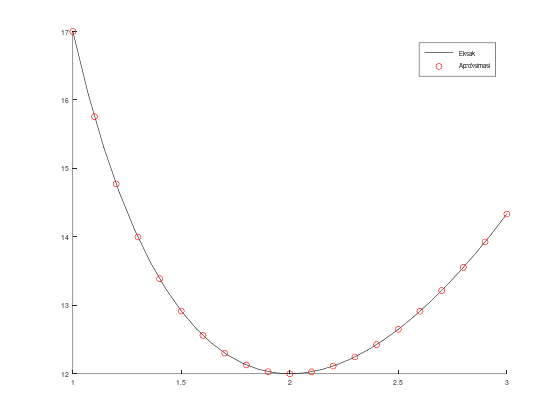

In [15]:
f = @(x, y, yp) ((1/8)*(32 + 2 * x.^3 - y .* yp));
fy = @(x, y, yp) (-yp/8);
fyp = @(x, y, yp) (-y/8);
a = 1;
b = 3;
N = 20;
alph = 17;
bet = 43/3;
tol = 10^(-5);

[xi, w1i, w2i] = nonlinear_shooting_newton(f, fy, fyp, a, b, N, alph, bet, tol, "");

sln = @(x) ((x .^ 2) + (16 ./ x));
y_eksak = sln(xi);

[xi, w1i', y_eksak]

hold on;
fplot(sln, [a,b], 'k');
scatter(xi, w1i', 'r');
legend('Eksak', 'Aproksimasi');

Jika kita run script file tersebut, maka program akan mengeluarkan dua macam output, yaitu tabel serta plot perbandingan solusi eksak dan aproksimasi seperti di bawah ini:

![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

## *Linear Finite Difference*

Metode ini digunakan untuk mengaproksimasi masalah linear dalam bentuk:

\begin{gathered}
y^{\prime \prime}=p(x) y^{\prime}+q(x) y+r(x), \quad a \leq x \leq b \\
y(a)=\alpha, y(b)=\beta
\end{gathered}

Penyelesaiannya adalah dengan persamaan-persamaan berikut:

\begin{gathered}
w_{0}=\alpha, \quad w_{N+1}=\beta \\
-\left(1+\frac{h}{2} p\left(x_{i}\right)\right) w_{i-1}+\left(2+h^{2} q\left(x_{i}\right)\right) w_{i}-\left(1-\frac{h}{2} p\left(x_{i}\right)\right) w_{i+1}=-h^{2} r\left(x_{i}\right)
\end{gathered}

Bentuk tersebut dapat dibuat sebagai suatu SPL:

$$
A \mathbf{w}=\mathbf{b}
$$

![](./pdnum6_Picture1.png)

$\mathbf{w}=\left[\begin{array}{c}w_{1} \\ w_{2} \\ \vdots \\ w_{N-1} \\ w_{N}\end{array}\right], \quad$ and $\quad \mathbf{b}=\left[\begin{array}{c}-h^{2} r\left(x_{1}\right)+\left(1+\frac{h}{2} p\left(x_{1}\right)\right) w_{0} \\ -h^{2} r\left(x_{2}\right) \\ \vdots \\ -h^{2} r\left(x_{N-1}\right) \\ -h^{2} r\left(x_{N}\right)+\left(1-\frac{h}{2} p\left(x_{N}\right)\right) w_{N+1}\end{array}\right]$.

Menurut buku, SPL tersebut sebaiknya diselesaikan dengan metode faktorisasi Crout (algoritma 6.7). (Intinya, mumpung A adalah matriks tridiagonal, algoritma ini nyari inverse A secara linier, makanya runtime dari algortima ini adalah $O(n)$)

Namun, tentunya kita bebas menyelesaikan SPLnya dengan cara apapun, bahkan dengan cara iteratif seperti Gauss-Seidel

### Function file (dari pseudocode)

In [5]:
function [xt,w]=linfdm_pseudocode(p,q,r,a_boundary,b_boundary,alpha,beta,n)
  h=(b_boundary-a_boundary)/(n+1); %stepsize
  a=zeros(n,1); %diagonal sistem persamaannya
  b=zeros(n,1); % right diagonal sistem persamaannya
  c=zeros(n,1); %left diagonal sistem persamaannya
  d=zeros(n,1); %vektor b (Ay=b) pada sistem persamaannya
  l=zeros(n,1); % main diagonal of lower triangle matrix
  u=zeros(n,1); %right diagonal of upper triangle matrix
  z= zeros(n,1); %solution of Lz=b
  w=zeros(n+1,1); %solusi aproksimasi dengan linear fdm
  xt=[a_boundary:h:b_boundary]; %mesh_point
  x=a_boundary+h;

  %konstruksi matrix tridiagonalnya
  a(1)=2+(h^2)*q(x);
  b(1)= -1+(h/2)*p(x);
  d(1)=-h^2*r(x) +(1+(h/2)*p(x))*alpha;

  for i = 2:n-1
    x= a_boundary+i*h;
    a(i)=2+h^2*q(x); %diagonal
    b(i)=-1+(h/2)*p(x);
    c(i)=-1-(h/2)*p(x);
    d(i)=-h^2*r(x);
  endfor

  x=b_boundary-h;
  a(n)=2+h^2*q(x);
  c(n)=-1-(h/2)*p(x);
  d(n)=-h^2*r(x)+(1-(h/2)*p(x))*beta;

  %matriks tridiagonalnya sudah didapatkan,
  %akan diselesaikan dengan LU Decomposition (crout factorization)

  l(1)= a(1);
  u(1)=b(1)/a(1);
  z(1)=d(1)/l(1);

  for i= 2:n-1
    l(i)=a(i)-c(i)*u(i-1);
    u(i)=b(i)/l(i);
    z(i)=(d(i)-c(i)*z(i-1))/l(i);

  endfor

  l(n)=a(n)-c(n)*u(n-1);
  z(n)=(d(n)-c(n)*z(n-1))/l(n);

  %konstruksi akhir w-nya
  w(n+1)=beta;
  w(n)=z(n);
  for i = n-1:-1:1
    w(i)=z(i)-u(i)*w(i+1);
  endfor

  w=[alpha;w];
  xt=transpose(xt);

endfunction

### Function file (dengan solusi SPL secara eksak/invers)

In [1]:
function [x, w_grid] = linear_fd_eksak(p, q, r, a, b, N, alph, bet)
  % bikin array x
  h = (b - a) / (N+1);
  x = a : h : b;

  % susun matriks A dan vektor b
  A = zeros(N, N);
  b = -h^2 * r(x(2:N+1));
  % kasus khusus untuk baris pertama
  b(1) += (1 + h/2 * p(x(2))) * alph;
  A(1, 1) += 2 + h^2 * q(x(2));
  A(1, 2) += -1 + h/2 * p(x(2));
  % kasus khusus untuk baris terakhir
  A(N, N-1) += -1 - h/2 * p(x(N+1));
  A(N, N) += 2 + h^2 * q(x(N+1));
  b(N) += (1 - h/2 * p(x(N+1))) * bet;
  % untuk baris kedua hingga kedua-terakhir
  for i = 2 : (N-1)
    A(i, i-1) += -1 - h/2 * p(x(i+1));
    A(i, i) += 2 + h^2 * q(x(i+1));
    A(i, i+1) += -1 + h/2 * p(x(i+1));
  endfor

  % selesaikan SPL
  w = A \ b';
  % w baru mengandung w1, ..., w_N

  % gabungkan dengan w0 (alpha) dan w_{N+1} (beta)
  w_grid = [alph w' bet];
endfunction

### Contoh *Linear Finite Difference*

Akan kita uji dengan masalah nilai batas:

$$
\begin{aligned}
y^{\prime \prime} & =-\frac{4}{x} y^{\prime}-\frac{2}{x^2} y+\frac{2 \ln x}{x^2}, \quad 1 \leq x \leq 2 \\
y(1) & =\frac{1}{2}, \quad y(2)=\ln 2
\end{aligned}
$$
Solusi eksak:
$$
y(x)=\frac{4}{x}-\frac{2}{x^2}+\ln x-\frac{3}{2}
$$

ans =

   1.0000   0.5000   0.5000        0
   1.0476   0.5425   0.5424   0.0001
   1.0952   0.5759   0.5758   0.0001
   1.1429   0.6024   0.6023   0.0001
   1.1905   0.6233   0.6232   0.0001
   1.2381   0.6397   0.6396   0.0001
   1.2857   0.6527   0.6525   0.0001
   1.3333   0.6628   0.6627   0.0001
   1.3810   0.6707   0.6706   0.0001
   1.4286   0.6768   0.6767   0.0001
   1.4762   0.6814   0.6813   0.0001
   1.5238   0.6850   0.6849   0.0001
   1.5714   0.6876   0.6875   0.0001
   1.6190   0.6895   0.6895   0.0001
   1.6667   0.6909   0.6908   0.0000
   1.7143   0.6918   0.6918   0.0000
   1.7619   0.6924   0.6924   0.0000
   1.8095   0.6928   0.6928   0.0000
   1.8571   0.6930   0.6930   0.0000
   1.9048   0.6931   0.6931   0.0000
   1.9524   0.6931   0.6931   0.0000
   2.0000   0.6931   0.6931   0.0000



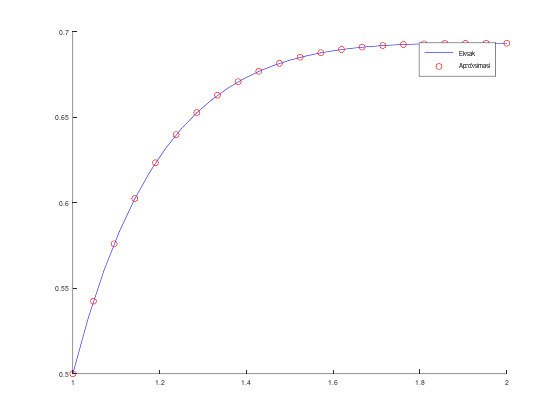

In [3]:
p= @(x) (-4./x); %function p(x)
q= @(x) (-2./x.^2);%function q(x)
r=@(x) 2*log(x)./(x.^2); %function r(x)
a=1; %batas kiri domain
b=2; %batas kanan domain
N=20; %banyaknya partisi
alph=0.5; %y(a)=alpha
bet=log(2); %y(b)=beta
[x_grid,w_grid] = linear_fd_eksak(p,q,r,a,b,N,alph,bet); %memangil fungsinya

sln = @(x) 4./x - 2./(x.^2) + log(x) - 1.5;
y_eksak = sln(x_grid);
err = abs(y_eksak - w_grid);

%bikin tabel dan grafiknya :D

[x_grid', w_grid', y_eksak', err']

hold on;
fplot(sln, [a,b], 'b')
scatter(x_grid, w_grid, 'r')
legend('Eksak', 'Aproksimasi');